# <div align="center"> SPECIAL TOPICS III </div>
## <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 10 - Deep Learning</div>
<div align="center"> Fabien Forge, (he/him)</div>

# Road Map
$$y=f(X) + \varepsilon$$
- Today is the last day we will learn about a new technique
- Deep learning (DL) is the technique behind most of artificial intelligence innovation in recent years
    - self-driving cars
    - image recognition
    - deep fakes etc.
- This lecture will not use the Introduction to Statistical Learning with Examples in R book
    - The second edition programmed to be released in May will include a chapter about deep learning
    - I will instead use the fairly technical bool [_Deep Learning_](https://www.deeplearningbook.org/)  by [Ian Goodfellow](https://en.wikipedia.org/wiki/Ian_Goodfellow) and the terrific [Kaggle tutorial](https://www.kaggle.com/learn/intro-to-deep-learning)
- Why was it not there in the first edition? Because predictive power of DL is at the expense of interpretation 
    - We know it's working but we are not sure what's going on deep inside

## What's deep in DL?
$$y=f(X) + \varepsilon$$
- So far we have used many methods to approximate the true function, let's call it $f^\ast(x)$ relating X to y
- Deep learning does it too bu in the following way:
$$f^\ast(x)= f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

- These chain structures are the most commonly used structures of __neural networks__. 
    - f(1) is called the first __layer__ of the network
    - f (2) is called the second layer, and so on.

## What is Deep Learning?

- Deep learning is an approach to machine learning characterized by deep stacks of computations. 
- This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.
- It is loosely based on the way neurones are activated and working together in the brain

# What's a neuron in neural network?
- Let's start with a familiar example represented in the deep learning framework
- How should think of a (single) __neuron__ the individual neuron. 
- As a diagram, a neuron (or **unit**) with one input looks like:
![](fig1_unit.png)

## Linear regression and Linear unit
- The Linear Unit is the previous slide can be represented by a very familiar function: 
    - $y = w x + b$
- This is obviously the equation of a line:
     - $w$ is called a __weight__ whose OLS equivalent is the slope $\beta$
     - $b$ is called a __bias__ (sorry! not my fault) and corresponds to the intercept $\alpha$

## Exemple - Cereal Dataset
- Let's use the [80-cereals](https://www.kaggle.com/crawford/80-cereals) from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


None

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


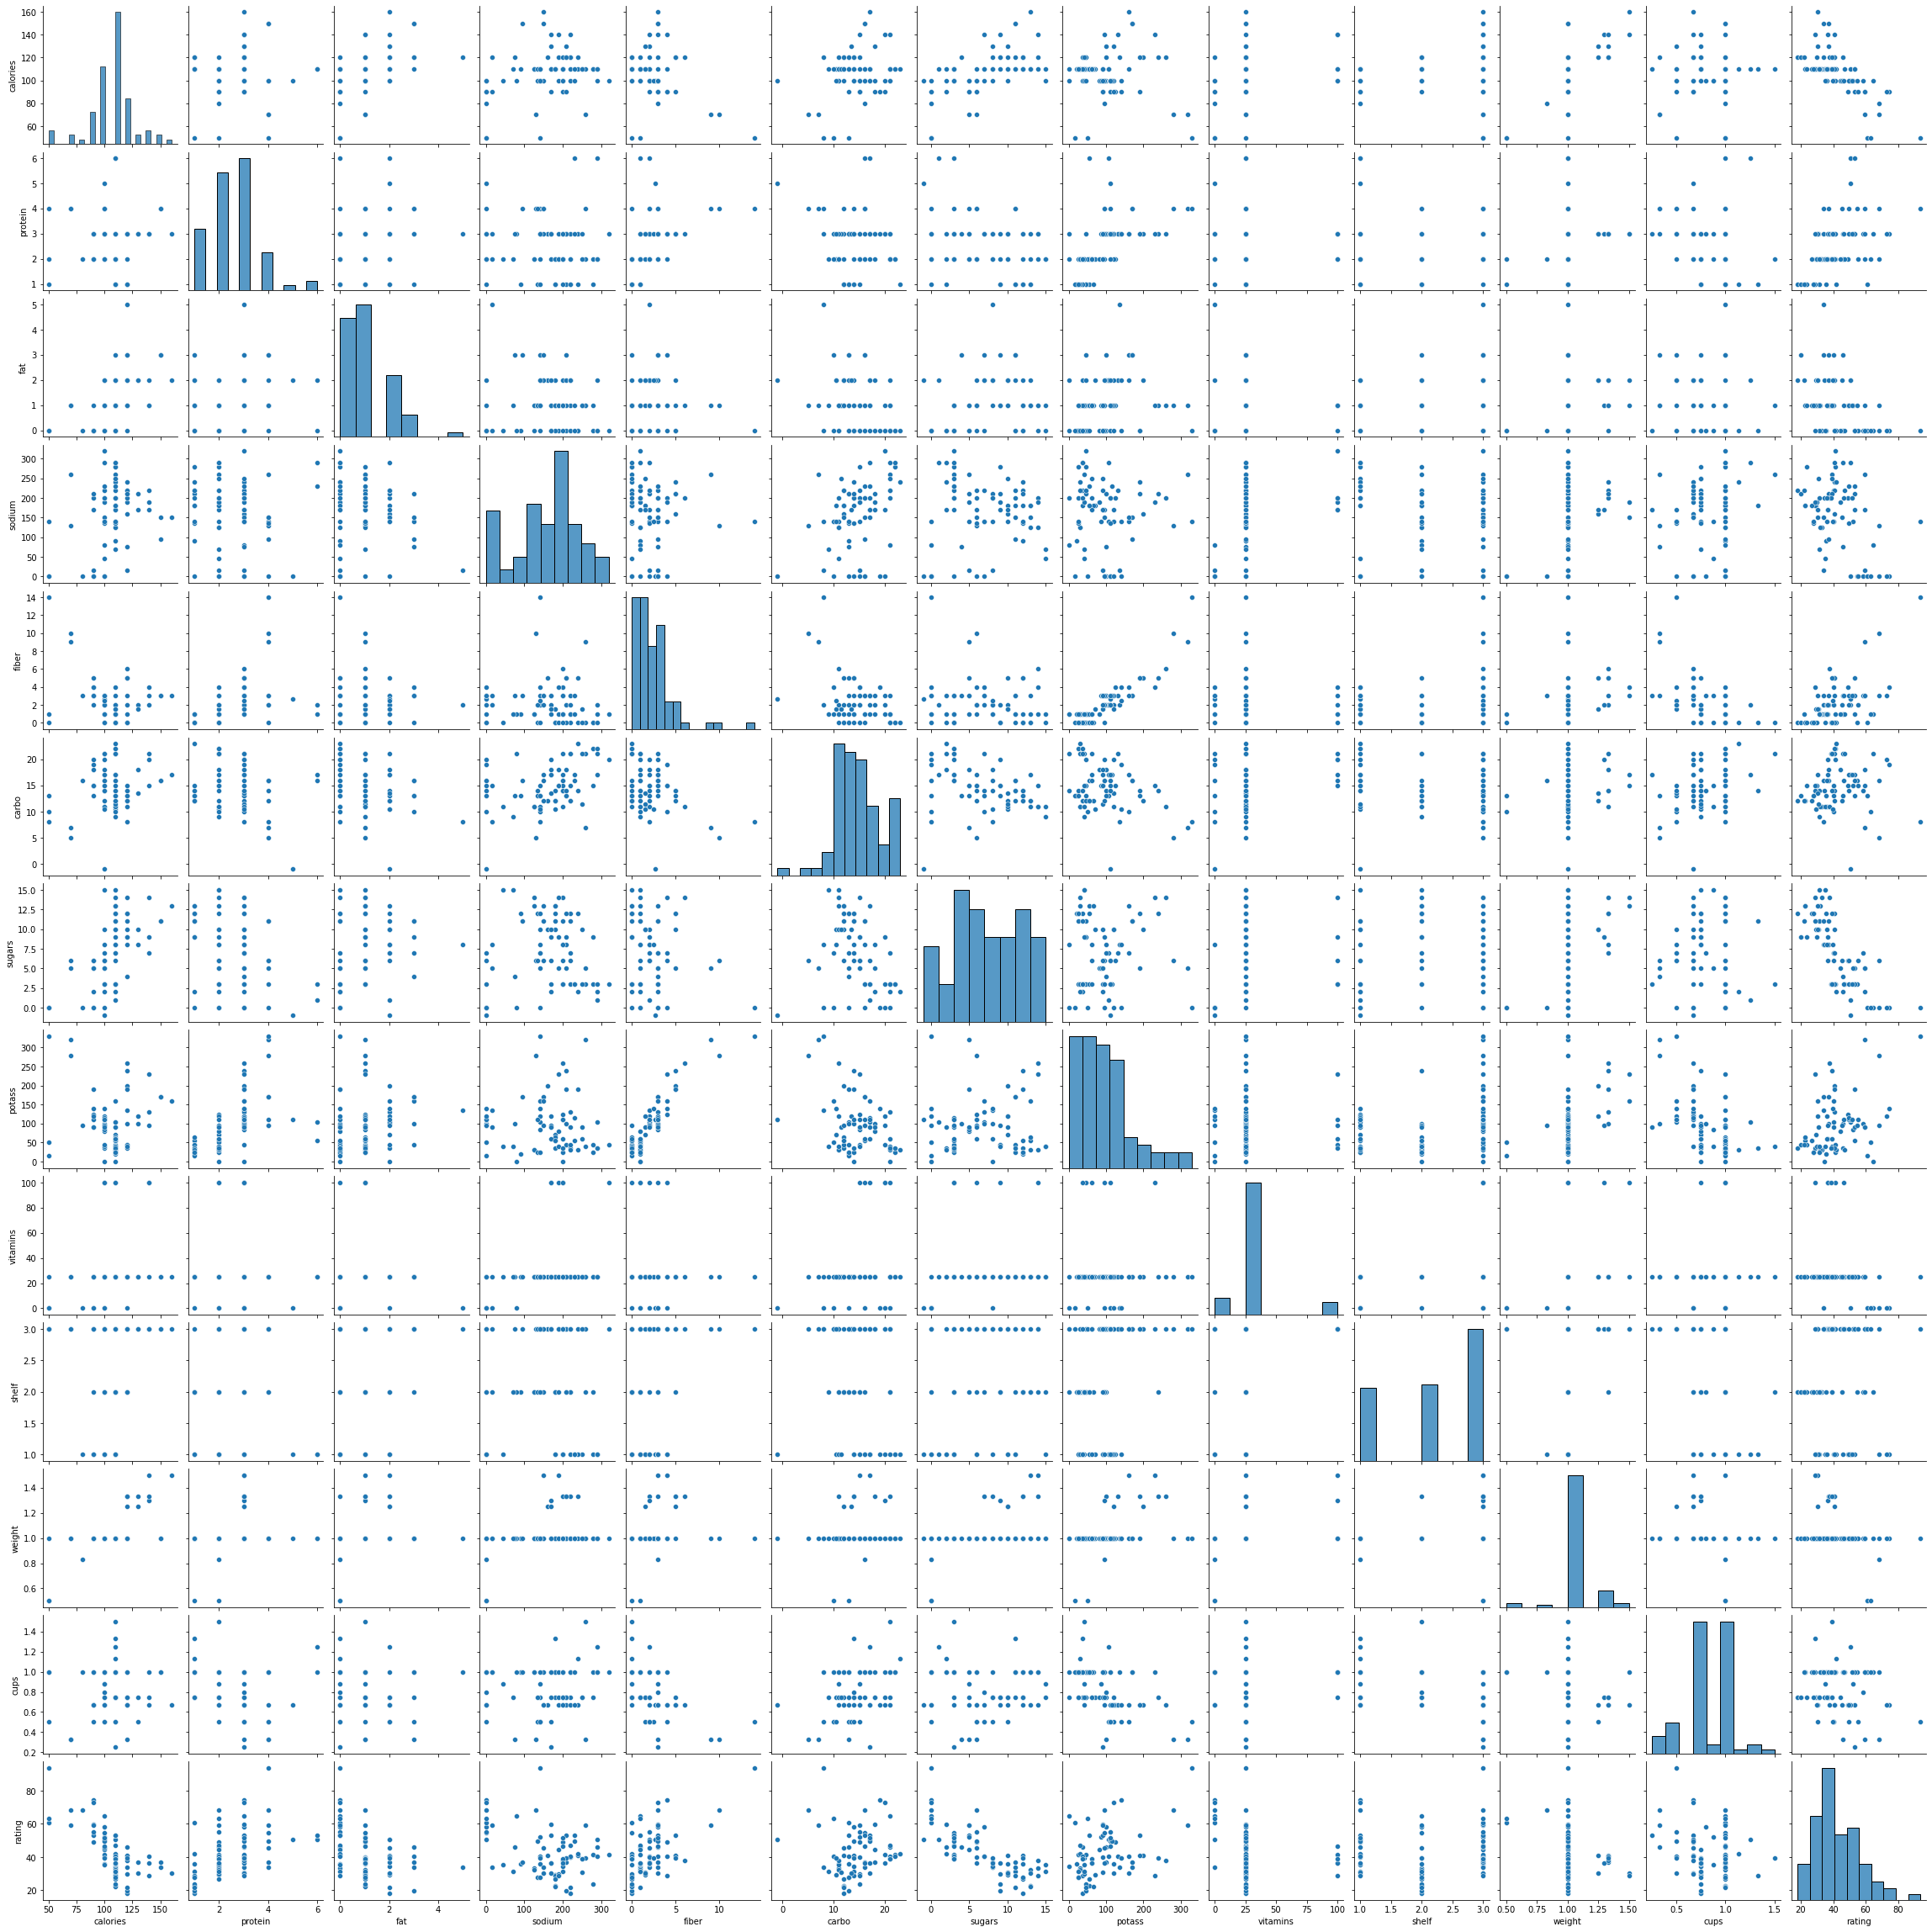

In [3]:
df=pd.read_csv("cereal.csv")
display(df.info())
display(df.describe().T)
display(df.head().append(df.tail()))
sns.pairplot(df)

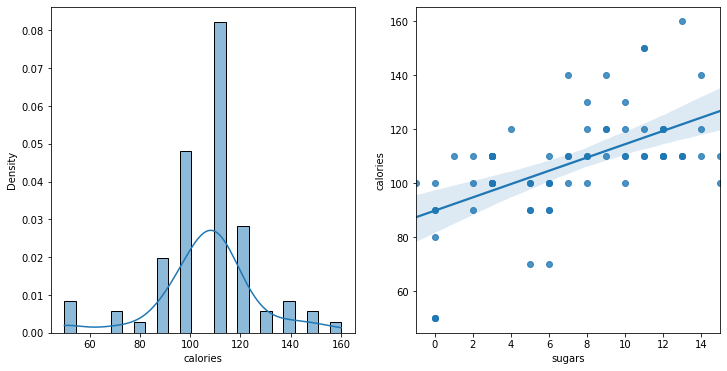

In [14]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.histplot(x="calories",kde=True, stat='density',data=df, ax=axes[0])
sns.regplot(x='sugars',y='calories',x_ci="sd",data=df, ax=axes[1])

plt.show()

# Linear unit continued
- The power of DL is to use a network of neurons, not just the one
- But building a single neuron models allows us to realize that this is an object we are familiar with:
    - A single neuron model is equivalent to a linear model

In [26]:
import statsmodels as sm
import statsmodels.formula.api as smf

mod=smf.ols("calories~sugars", data=df)
res=mod.fit()

print(res.summary())
print(res.params)
print(f"\nPredicted Calories for Sugar content of 5 is b={round(res.params['Intercept'])} + w={round(res.params['sugars'],1)} *X = {round(res.params['Intercept']) + (5*round(res.params['sugars'],1))}")

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     34.69
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.02e-07
Time:                        13:26:48   Log-Likelihood:                -322.78
No. Observations:                  77   AIC:                             649.6
Df Residuals:                      75   BIC:                             654.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.8201      3.437     26.137      0.0

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

# # Create a network with 1 linear unit
# model = keras.Sequential([
#     layers.Dense(units=1, input_shape=[3])
# ])

ModuleNotFoundError: No module named 'tensorflow'

<figure style="padding: 1em;">
<img src="https://i.imgur.com/yjsfFvY.png" width="1000" alt="Computing with the linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>Computing with the linear unit.
</center></figcaption>
</figure>

And, checking against our formula, we have $calories = 2.5 \times 5 + 90 = 102.5$, just like we expect.